In [1]:
# Cell 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For better date handling
from datetime import datetime


In [2]:
# Cell 2: Load data
df = pd.read_csv("smart_home_energy_consumption.csv", parse_dates=["Timestamp"])

# Show first few rows
df.head()


,Timestamp,Device ID,Device Type,Power Consumption (W),Room Location,Temperature (°C),Humidity (%),Usage Duration (minutes),Energy Cost ($),On/Off Status
0,2024-03-25 16:38:00,D-1860,Washing Machine,341.72,Garage,23.95,52.29,75,51.26,On
1,2024-05-01 16:03:00,D-9322,Laptop Charger,31.24,Bedroom,25.83,76.93,130,8.12,On
2,2024-06-12 17:56:00,D-5555,Smart Bulb,11.12,Garage,21.48,44.56,59,1.31,On
3,2024-04-13 19:43:00,D-2899,Heater,2028.47,Living Room,15.70,60.38,21,85.20,On
4,2024-08-30 16:17:00,D-9792,Washing Machine,732.82,Bedroom,20.78,30.80,130,190.53,On


In [4]:
# Cell 3: Data info and cleaning

print("Initial data info:")
df.info()

# Check for missing values
print("\nMissing values per column:")
print(df.isna().sum())

# Fill or drop missing if any (example: fill temp with mean)
df['Usage Duration (minutes)'] = df['Usage Duration (minutes)'].fillna(df['Usage Duration (minutes)'].mean())

print("\nAfter filling missing Usage Duration:")
print(df.isna().sum())

# Convert On/Off Status to boolean for easier analysis
df['On/Off Status'] = df['On/Off Status'].map({'On': True, 'Off': False})

df.info()


Initial data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Timestamp                 50000 non-null  datetime64[ns]
 1   Device ID                 50000 non-null  object        
 2   Device Type               50000 non-null  object        
 3   Power Consumption (W)     50000 non-null  float64       
 4   Room Location             50000 non-null  object        
 5   Temperature (°C)          50000 non-null  float64       
 6   Humidity (%)              50000 non-null  float64       
 7   Usage Duration (minutes)  50000 non-null  int64         
 8   Energy Cost ($)           50000 non-null  float64       
 9   On/Off Status             50000 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 3.1+ MB

Missing values per column:
Timestamp          

Average Power Consumption by Device Type:
Device Type
Heater             2000.442311
Air Conditioner    1502.079507
Microwave          1199.574159
Washing Machine     501.362613
Refrigerator        197.889434
TV                  100.149217
Ceiling Fan          74.807121
Laptop Charger       60.155796
Smart Bulb            9.986535
Smart Plug            5.003413
Name: Power Consumption (W), dtype: float64


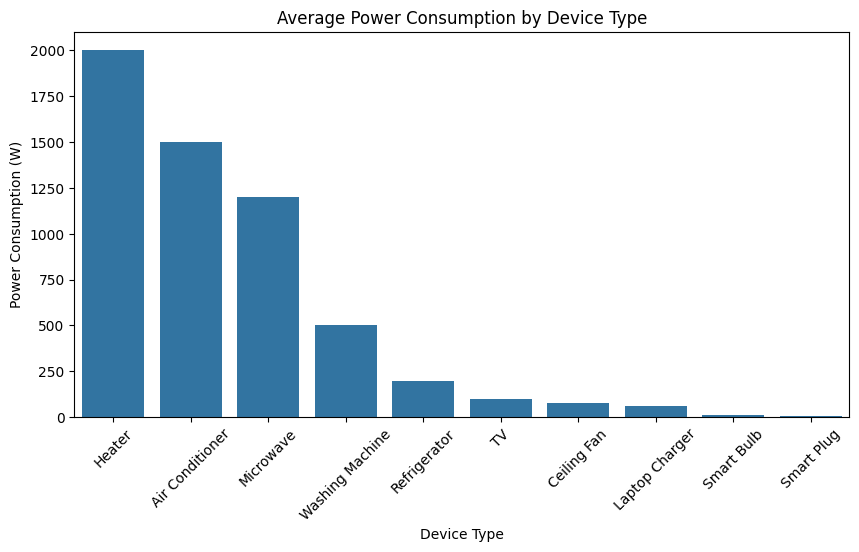

In [5]:
# Cell 4: Insight 1 - Average Power Consumption by Device Type

avg_power = df.groupby("Device Type")["Power Consumption (W)"].mean().sort_values(ascending=False)
print("Average Power Consumption by Device Type:")
print(avg_power)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_power.index, y=avg_power.values)
plt.xticks(rotation=45)
plt.title("Average Power Consumption by Device Type")
plt.ylabel("Power Consumption (W)")
plt.show()


Total Energy Cost by Room Location:
Room Location
Garage         881420.40
Living Room    874299.90
Bedroom        872892.30
Bathroom       859452.08
Office         851785.96
Kitchen        825784.34
Name: Energy Cost ($), dtype: float64


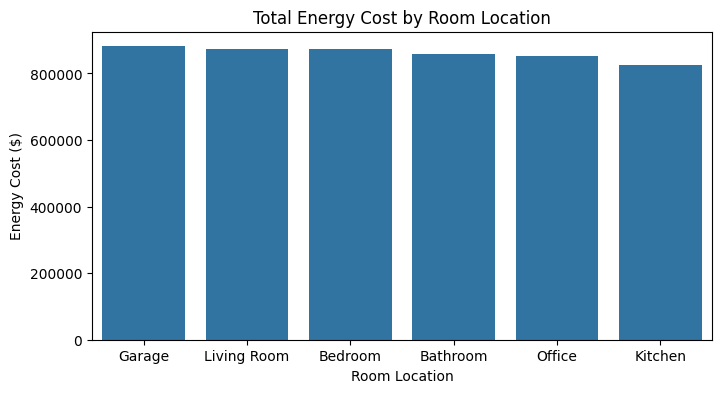

In [6]:
# Cell 5: Insight 2 - Total Energy Cost by Room Location

total_cost = df.groupby("Room Location")["Energy Cost ($)"].sum().sort_values(ascending=False)
print("Total Energy Cost by Room Location:")
print(total_cost)

plt.figure(figsize=(8,4))
sns.barplot(x=total_cost.index, y=total_cost.values)
plt.title("Total Energy Cost by Room Location")
plt.ylabel("Energy Cost ($)")
plt.show()


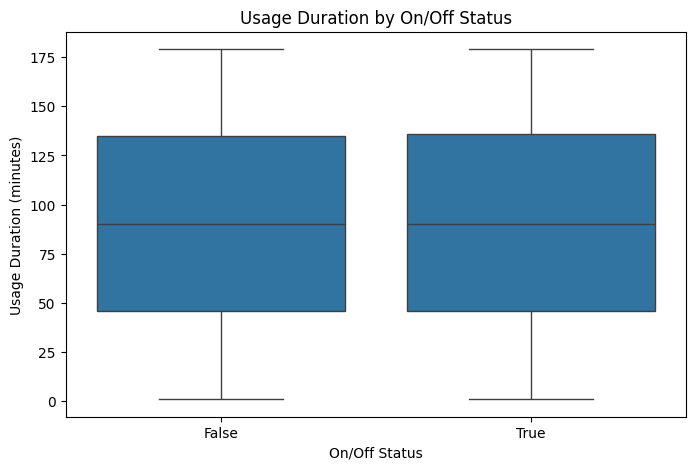

In [7]:
# Cell 6: Insight 3 - Usage Duration distribution by On/Off Status

plt.figure(figsize=(8,5))
sns.boxplot(x='On/Off Status', y='Usage Duration (minutes)', data=df)
plt.title("Usage Duration by On/Off Status")
plt.show()


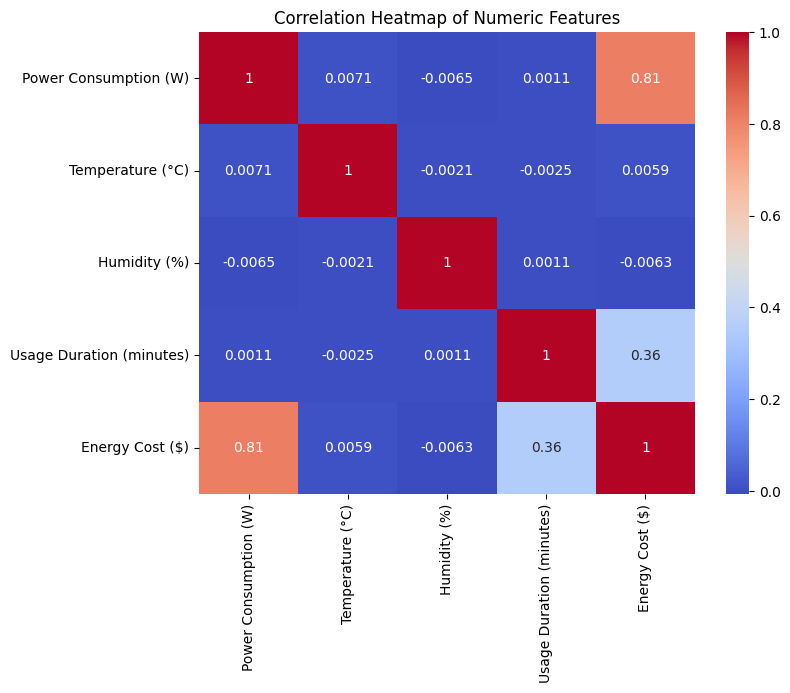

In [8]:
# Cell 7: Insight 4 - Correlation heatmap for numeric columns

plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [9]:
# Cell 8: Insight 5 - Filter devices currently On consuming above average power

avg_power_consumption = df['Power Consumption (W)'].mean()
high_power_on = df[(df['On/Off Status'] == True) & (df['Power Consumption (W)'] > avg_power_consumption)]
print(f"Devices ON with power consumption above average ({avg_power_consumption:.2f} W):")
print(high_power_on[['Device ID', 'Device Type', 'Power Consumption (W)', 'Room Location']])


Devices ON with power consumption above average (570.84 W):
      Device ID      Device Type  Power Consumption (W) Room Location
3        D-2899           Heater                2028.47   Living Room
4        D-9792  Washing Machine                 732.82       Bedroom
10       D-4104  Air Conditioner                 845.34        Office
11       D-9110           Heater                2426.49   Living Room
14       D-3693  Air Conditioner                1434.80      Bathroom
...         ...              ...                    ...           ...
49967    D-3183        Microwave                1742.84   Living Room
49970    D-7303  Air Conditioner                1603.75        Office
49976    D-8307  Air Conditioner                1128.43        Office
49991    D-4695           Heater                2615.87       Bedroom
49994    D-1251        Microwave                 653.39      Bathroom

[11790 rows x 4 columns]


In [10]:
# Cell 9: Save cleaned dataset (optional)

df.to_csv("cleaned_energy_data.csv", index=False)
print("Cleaned data saved to cleaned_energy_data.csv")


Cleaned data saved to cleaned_energy_data.csv
